Лабораторна робота 2.
Аналіз даних. Бібліотека Pandas

Імпорт бібліотек та зчитування даних

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Зчитуємо дані з Вікіпедії
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables = pd.read_html(url)
gdp_df = tables[2]


#Завдання 1

1. Вивести перших 5 рядків.

In [4]:
gdp_df.head()

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

2. Визначити розмір датасета.



In [ ]:
gdp_df.shape


(210, 7)

3. Визначити оптимальну кількість стовпців.

In [ ]:
gdp_df.columns


MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )

4. Змінити назви стовпців на більш зручні, наприклад
Country MVF_2024 WorldBank_2023 OON_2022


In [ ]:
old_columns = [
    ('Country/Territory', 'Country/Territory'),
    ('IMF[1][13]', 'Forecast'),
    ('IMF[1][13]', 'Year'),
    ('World Bank[14]', 'Estimate'),
    ('World Bank[14]', 'Year'),
    ('United Nations[15]', 'Estimate'),
    ('United Nations[15]', 'Year')
    ]

new_columns = [
    'Country',
    'IMF_Forecast',
    'IMF_Year',
    'WorldBank_Estimate',
    'WorldBank_Year',
    'UN_Estimate',
    'UN_Year'
    ]

gdp_df.columns = new_columns
gdp_df.head

<bound method NDFrame.head of               Country IMF_Forecast   IMF_Year WorldBank_Estimate  \
0               World    109529216       2024          105435540   
1       United States     28781083       2024           27360935   
2               China     18532633  [n 1]2024           17794782   
3             Germany      4591100       2024            4456081   
4               Japan      4110452       2024            4212945   
..                ...          ...        ...                ...   
205          Kiribati          311       2024                279   
206             Palau          308       2024                263   
207  Marshall Islands          305       2024                284   
208             Nauru          161       2024                154   
209            Tuvalu           66       2024                 62   

    WorldBank_Year UN_Estimate    UN_Year  
0             2023   100834796       2022  
1             2023    25744100       2022  
2        [n 3]2023    17963170  [n 1]2022  
3             2023     4076923       2022  
4             2023     4232173       2022  
..             ...         ...        ...  
205           2023         223       2022  
206           2023         225       2022  
207           2023         279       2022  
208           2023         147       2022  
209           2023          59       2022  

[210 rows x 7 columns]>

In [ ]:
selected_columns = {
    'IMF_Forecast': 'MVF_2024',
    'WorldBank_Estimate': 'WorldBank_2023',
    'UN_Estimate': 'OON_2022'
}

df_new = gdp_df[['Country'] + list(selected_columns.keys())]

gdp_df = df_new.rename(columns=selected_columns)
print(gdp_df.head())

         Country   MVF_2024 WorldBank_2023   OON_2022
0          World  109529216      105435540  100834796
1  United States   28781083       27360935   25744100
2          China   18532633       17794782   17963170
3        Germany    4591100        4456081    4076923
4          Japan    4110452        4212945    4232173


5. Визначити тип даних.


In [ ]:
print(gdp_df.dtypes)

Country           object
MVF_2024          object
WorldBank_2023    object
OON_2022          object
dtype: object


6. Замініть у таблиці значення "—" на значення NaN. Перевірити
наявність пропущених значень. При наявності, замінити пропущені
значення на середнє значення.


In [ ]:
print(gdp_df.isnull().sum())

Country            0
MVF_2024          15
WorldBank_2023     8
OON_2022           1
dtype: int64


In [ ]:
gdp_df.replace('—', float('nan'), inplace=True)

gdp_df['MVF_2024'] = pd.to_numeric(gdp_df['MVF_2024'], errors='coerce')
gdp_df['WorldBank_2023'] = pd.to_numeric(gdp_df['WorldBank_2023'], errors='coerce')
gdp_df['OON_2022'] = pd.to_numeric(gdp_df['OON_2022'], errors='coerce')

print("Типи дпних після конвертації:\n", gdp_df.dtypes)

print(gdp_df.head())

Типи дпних після конвертації:
 Country            object
MVF_2024          float64
WorldBank_2023    float64
OON_2022          float64
dtype: object
         Country     MVF_2024  WorldBank_2023     OON_2022
0          World  109529216.0     105435540.0  100834796.0
1  United States   28781083.0      27360935.0   25744100.0
2          China   18532633.0      17794782.0   17963170.0
3        Germany    4591100.0       4456081.0    4076923.0
4          Japan    4110452.0       4212945.0    4232173.0


In [ ]:
gdp_df = gdp_df.replace({'—': np.NAN})
gdp_df = gdp_df.fillna(gdp_df.mean(numeric_only=True), axis=0)
print(gdp_df.head)

<bound method NDFrame.head of               Country     MVF_2024  WorldBank_2023     OON_2022
0               World  109529216.0     105435540.0  100834796.0
1       United States   28781083.0      27360935.0   25744100.0
2               China   18532633.0      17794782.0   17963170.0
3             Germany    4591100.0       4456081.0    4076923.0
4               Japan    4110452.0       4212945.0    4232173.0
..                ...          ...             ...          ...
205          Kiribati        311.0           279.0        223.0
206             Palau        308.0           263.0        225.0
207  Marshall Islands        305.0           284.0        279.0
208             Nauru        161.0           154.0        147.0
209            Tuvalu         66.0            62.0         59.0

[210 rows x 4 columns]>


7. Ще раз перевірити наявність пропущених значень.

In [ ]:
print(gdp_df.isnull().sum())

Country           0
MVF_2024          0
WorldBank_2023    0
OON_2022          0
dtype: int64


9. Вивести описову статистику датасету describe()


In [ ]:
print(gdp_df.describe())

           MVF_2024  WorldBank_2023      OON_2022
count  2.100000e+02    2.100000e+02  2.100000e+02
mean   1.123228e+06    1.037206e+06  9.612699e+05
std    7.900707e+06    7.602076e+06  7.275608e+06
min    6.600000e+01    6.200000e+01  5.900000e+01
25%    1.464775e+04    1.044175e+04  8.928250e+03
50%    6.215800e+04    4.341600e+04  3.210250e+04
75%    4.366365e+05    3.376592e+05  2.412485e+05
max    1.095292e+08    1.054355e+08  1.008348e+08


10. Визначте відхилення (різницю) між показниками MVF_2024 та
WorldBank_2023 для кожної країни. У яких країнах ці показники
найбільше відрізняються (дати відповідт)?

In [ ]:
gdp_df['Difference_MVF_WB'] = gdp_df['MVF_2024'] - gdp_df['WorldBank_2023']

# Знайдемо країни з найбільшим і найменшим відхиленням
max_diff_country = gdp_df.loc[gdp_df['Difference_MVF_WB'].idxmax(), 'Country']
min_diff_country = gdp_df.loc[gdp_df['Difference_MVF_WB'].idxmin(), 'Country']

print(f"Найбільше відхилення між MVF_2024 та WorldBank_2023 у країни: {max_diff_country}")
print(f"Найменше відхилення між MVF_2024 та WorldBank_2023 у країни: {min_diff_country}")


Найбільше відхилення між MVF_2024 та WorldBank_2023 у країни: World
Найменше відхилення між MVF_2024 та WorldBank_2023 у країни: South Sudan


11.Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та
OON_2022. Які пари змінних мають найвищу кореляцію?

In [ ]:
correlation = gdp_df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].corr()
print("Кореляція між показниками:\n", correlation)

Кореляція між показниками:
                 MVF_2024  WorldBank_2023  OON_2022
MVF_2024        1.000000        0.999351  0.999246
WorldBank_2023  0.999351        1.000000  0.999656
OON_2022        0.999246        0.999656  1.000000


12.Обчисліть середнє значення для кожного стовпця (MVF_2024,
WorldBank_2023, OON_2022). Як це середнє значення змінюється між
роками?

In [ ]:
mean_values = gdp_df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean()
print("Середнє значення для кожного року:\n", mean_values)

Середнє значення для кожного року:
 MVF_2024          1.123228e+06
WorldBank_2023    1.037206e+06
OON_2022          9.612699e+05
dtype: float64


13.Обчисліть стандартне відхилення показників для кожної країни. Яка
країна має найвищу варіативність у показниках між роками?


In [ ]:
gdp_df['StdDev'] = gdp_df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)

# Знайдемо країну з найбільшою варіативністю між роками
max_var_country = gdp_df.loc[gdp_df['StdDev'].idxmax(), 'Country']
print(f"Країна з найбільшою варіативністю показників між роками: {max_var_country}")


Країна з найбільшою варіативністю показників між роками: World


14.Визначення країни з найвищим та найнижчим показниками: Знайдіть
країну з найвищим та найнижчим показниками у кожному з років
(MVF_2024, WorldBank_2023, OON_2022).

In [ ]:
max_MVF_2024 = gdp_df.loc[gdp_df['MVF_2024'].idxmax(), 'Country']
min_MVF_2024 = gdp_df.loc[gdp_df['MVF_2024'].idxmin(), 'Country']

max_WB_2023 = gdp_df.loc[gdp_df['WorldBank_2023'].idxmax(), 'Country']
min_WB_2023 = gdp_df.loc[gdp_df['WorldBank_2023'].idxmin(), 'Country']

max_OON_2022 = gdp_df.loc[gdp_df['OON_2022'].idxmax(), 'Country']
min_OON_2022 = gdp_df.loc[gdp_df['OON_2022'].idxmin(), 'Country']

print(f"Найвищий MVF_2024 у країни: {max_MVF_2024}, найнижчий у країни: {min_MVF_2024}")
print(f"Найвищий WorldBank_2023 у країни: {max_WB_2023}, найнижчий у країни: {min_WB_2023}")
print(f"Найвищий OON_2022 у країни: {max_OON_2022}, найнижчий у країни: {min_OON_2022}")


Найвищий MVF_2024 у країни: World, найнижчий у країни: Tuvalu
Найвищий WorldBank_2023 у країни: World, найнижчий у країни: Tuvalu
Найвищий OON_2022 у країни: World, найнижчий у країни: Tuvalu


15.Побудуйте гістограму для розподілу показників MVF_2024 серед всіх
країн. Який вигляд має розподіл? Чи є країни, що виділяються?

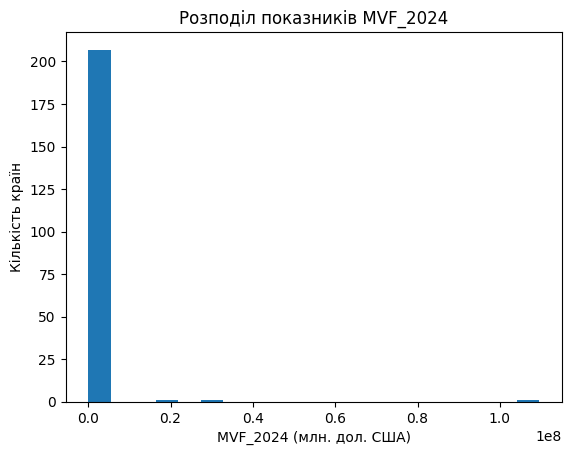

In [ ]:
import matplotlib.pyplot as plt

plt.hist(gdp_df['MVF_2024'].dropna(), bins=20)
plt.title('Розподіл показників MVF_2024')
plt.xlabel('MVF_2024 (млн. дол. США)')
plt.ylabel('Кількість країн')
plt.show()

16.Розрахуйте частку кожної країни в загальному значенні для кожного
року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки
країн з часом (дати відповідь)?

In [ ]:
gdp_df['Share_MVF_2024'] = gdp_df['MVF_2024'] / gdp_df['MVF_2024'].sum()
gdp_df['Share_WB_2023'] = gdp_df['WorldBank_2023'] / gdp_df['WorldBank_2023'].sum()
gdp_df['Share_OON_2022'] = gdp_df['OON_2022'] / gdp_df['OON_2022'].sum()

print("Частки країн за роками:\n", gdp_df[['Country', 'Share_MVF_2024', 'Share_WB_2023', 'Share_OON_2022']])

Частки країн за роками:
               Country  Share_MVF_2024  Share_WB_2023  Share_OON_2022
0               World    4.643473e-01   4.840638e-01    4.995119e-01
1       United States    1.220169e-01   1.256165e-01    1.275302e-01
2               China    7.856878e-02   8.169741e-02    8.898532e-02
3             Germany    1.946389e-02   2.045826e-02    2.019612e-02
4               Japan    1.742619e-02   1.934200e-02    2.096519e-02
..                ...             ...            ...             ...
205          Kiribati    1.318479e-06   1.280914e-06    1.104690e-06
206             Palau    1.305761e-06   1.207456e-06    1.114597e-06
207  Marshall Islands    1.293042e-06   1.303869e-06    1.382100e-06
208             Nauru    6.825568e-07   7.070275e-07    7.282034e-07
209            Tuvalu    2.798059e-07   2.846475e-07    2.922721e-07

[210 rows x 4 columns]


17.Візуалізуйте зміни в показниках для кожної країни за три роки на
графіку. Які країни показують стабільне зростання або спад (дати
відповідь)?

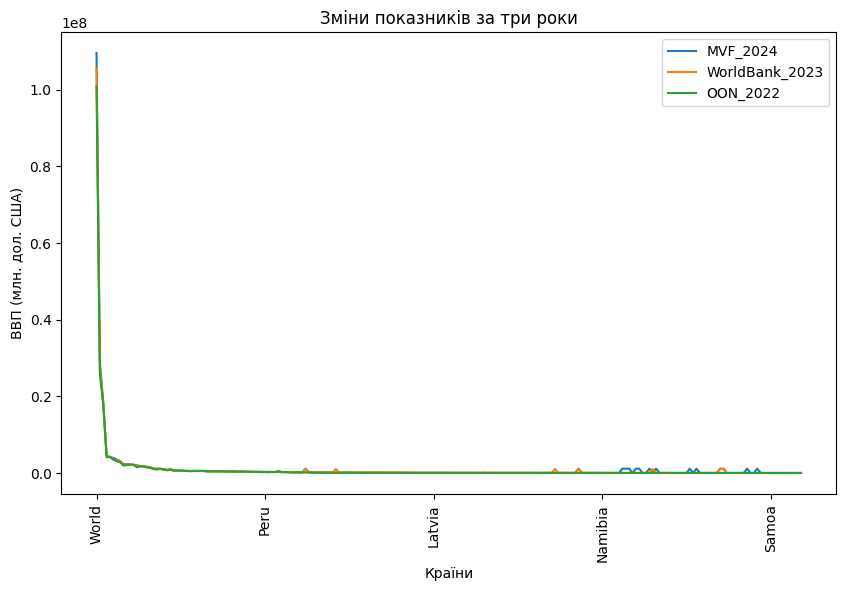

In [ ]:
gdp_df.set_index('Country')[['MVF_2024', 'WorldBank_2023', 'OON_2022']].plot(kind='line', figsize=(10, 6))
plt.title('Зміни показників за три роки')
plt.ylabel('ВВП (млн. дол. США)')
plt.xlabel('Країни')
plt.xticks(rotation=90)
plt.show()

#Завдання 2

1. Вивести перших 5 рядків.

In [28]:
from google.colab import drive
drive.mount('/content/drive')



# Прочитайте csv файл
file_path = '/content/drive/My Drive/titanic.csv'

df = pd.read_csv(file_path)

# Виведіть перші п'ять рядків
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN      

2. Визначити розмір датасета.

In [29]:
df.shape

(418, 12)

3. Визначити тип даних.

In [30]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


4. Визначити наявність пропущених значень. При наявності, замінити
пропущені значення на середнє значення.

In [31]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [32]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

5. Ще раз перевірити наявність пропущених значень.

In [33]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


6. Перевірити наявність дублікатів. При наявності видалити дублікати.

In [34]:
duplicates = df.duplicated().sum()
print(f"Кількість дублікатів: {duplicates}")

if duplicates > 0:
    df.drop_duplicates(inplace=True)

Кількість дублікатів: 0


7. Вивести описову статистику датасету describe()

In [35]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   12.634534    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   23.000000    0.000000   
50%    1100.500000    0.000000    3.000000   30.272590    0.000000   
75%    1204.750000    1.000000    3.000000   35.750000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  418.000000  
mean     0.392344   35.627188  
std      0.981429   55.840500  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


8. Видалити стовпчик Cabin

In [36]:
df.drop('Cabin', axis=1, inplace=True)

In [38]:
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Embarked  
0   330911   7.8292        Q  
1   363272   7.0000        S  
2   240276   9.6875        Q  
3   315154   8.6625        S  
4  3101298  12.2875        S  


9. Сформувати датасет з обраними стовпцями:
['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

In [37]:
selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
df = df[selected_columns]
print(df.head())

   Survived  Pclass     Sex   Age     Fare
0         0       3    male  34.5   7.8292
1         1       3  female  47.0   7.0000
2         0       2    male  62.0   9.6875
3         0       3    male  27.0   8.6625
4         1       3  female  22.0  12.2875


10. Замінити бінарні ознаки (Стать) на 0 і 1 (але перевірте унікальні
значення даного стовпчика).

In [39]:
print(df['Sex'].unique())

['male' 'female']


In [41]:
df['Sex'] = df['Sex'].replace({'female': 1, 'male': 0}).astype(int)
print(df.head())

   Survived  Pclass  Sex   Age     Fare
0         0       3    0  34.5   7.8292
1         1       3    1  47.0   7.0000
2         0       2    0  62.0   9.6875
3         0       3    0  27.0   8.6625
4         1       3    1  22.0  12.2875


<ipython-input-41-13d98daef6bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Sex'] = df_selected['Sex'].replace({'female': 1, 'male': 0}).astype(int)


11. Ще раз перевірити кількість пропущених даних (впевнитись, що їх
немає).

In [40]:
print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64


12. Вивести 5 перших рядків датасету.

In [42]:
print(df.head())

   Survived  Pclass  Sex   Age     Fare
0         0       3    0  34.5   7.8292
1         1       3    1  47.0   7.0000
2         0       2    0  62.0   9.6875
3         0       3    0  27.0   8.6625
4         1       3    1  22.0  12.2875


13. Вивести 5 останніх рядків датасету.

In [43]:
print(df.tail())

     Survived  Pclass  Sex       Age      Fare
413         0       3    0  30.27259    8.0500
414         1       1    1  39.00000  108.9000
415         0       3    0  38.50000    7.2500
416         0       3    0  30.27259    8.0500
417         0       3    0  30.27259   22.3583


14.Аналіз виживання залежно від статі: Обчисліть відсоток виживання
для кожної статі. Чи була різниця у виживанні між чоловіками та
жінками?

In [44]:
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100
print("Відсоток виживання за статтю:\n", survival_by_sex)

Відсоток виживання за статтю:
 Sex
0      0.0
1    100.0
Name: Survived, dtype: float64


15. Обчисліть відсоток виживання для кожного класу (Pclass). Який
клас мав найвищий рівень виживання (дати відповідь)?


In [45]:
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print("Відсоток виживання за класом:\n", survival_by_class)


Відсоток виживання за класом:
 Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64


16. Визначте середній вік тих, хто вижив, і тих, хто не вижив. Чи
впливає вік на виживання (дати відповідь)?

In [46]:
mean_age_by_survival = df.groupby('Survived')['Age'].mean()
print("Середній вік за статусом виживання:\n", mean_age_by_survival)


Середній вік за статусом виживання:
 Survived
0    30.272699
1    30.272400
Name: Age, dtype: float64


17. Розподіліть пасажирів на групи за рівнями тарифів (Fare) і
обчисліть рівень виживання для кожної групи. Як тариф впливав на
шанси виживання (дати відповідь)?

In [47]:
df['Fare_Group'] = pd.qcut(df['Fare'], 4, labels=False)
survival_by_fare_group = df.groupby('Fare_Group')['Survived'].mean() * 100
print("Відсоток виживання за групами тарифів:\n", survival_by_fare_group)


Відсоток виживання за групами тарифів:
 Fare_Group
0    26.315789
1    27.083333
2    39.047619
3    53.398058
Name: Survived, dtype: float64


<ipython-input-47-02d9733316ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Fare_Group'] = pd.qcut(df_selected['Fare'], 4, labels=False)


18. Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного
класу (Pclass). Чи існує значна різниця у тарифах між класами (дати
відповідь)?

In [48]:
mean_fare_by_class = df.groupby('Pclass')['Fare'].mean()
print("Середній тариф за класом:\n", mean_fare_by_class)

Середній тариф за класом:
 Pclass
1    94.280297
2    22.202104
3    12.565951
Name: Fare, dtype: float64


19. Обчисліть середній вік пасажирів для кожного класу (Pclass). Як вік
пасажирів розподіляється за класами (дати відповідь)?

In [49]:
mean_age_by_class = df.groupby('Pclass')['Age'].mean()
print("Середній вік за класом:\n", mean_age_by_class)

Середній вік за класом:
 Pclass
1    40.022928
2    28.857881
3    26.090397
Name: Age, dtype: float64
